# Module 02: A Box Model Carbon Assignment

## Due: 2021-09-21

## Name: Samantha Taylor

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

## Problem A: Modify and rerun the model

### 1. Modify the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M1i = 1100.0 # mass of carbon in atmosphere [gigatons, GtC]
M2i = 300.0 # mass of carbon in land, [gigatons, GtC]

k12 = 0.0003 # constant used to calculate photosynethesis (land), 1/years (residence time, turnover time, etc)
k21 = 0.1 # constant used to calculate respiration and decay (atmosphere), 1/years (residence time, turnover time, etc)

ti = 0.0 # initial time start [years]
tf = 100.0 # ending time [years]
dt = 1/365 # change in time [days]

### 2. Repeat the "unforced" simulation

In [2]:
t = np.arange(ti,tf+dt,dt) # create an array starting at ti, going to tf+dt, with dt step size

Nt = t.size # return the size of t

print('t has '+str(Nt)+' time steps') # str(Nt) converts Nt into a string

M1 = np.zeros((Nt,)) # create an array with Nt rows of zeros
M2 = np.zeros((Nt,)) # create an array with Nt rows of zeros

for i in np.arange(Nt): # loop through all elements in an array in this case going from 0 to (Nt-1)
    if (i==0):

        M1[i] = M1i # if i = 0, set M1[i] equal to the initial amount of carbon in the atmosphere
        M2[i] = M2i # if i = 0, set M2[i] equal to the initial amount of carbon in the land
        
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] # the change in carbon in the atmosphere WRT 
                                                  # = respirtation & decay - photosynthesis
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1] # the change in carbon in the land WRT 
                                                  # = photosynthesis - respiration & decay
        
        M1[i] = M1[i-1] + dM1dt*dt # mass of carbon in the atmosphere for time > 0
                                   # = the previous mass of carbon in the atmosphere + the change of carbon in the atmosphere
        M2[i] = M2[i-1] + dM2dt*dt # mass of carbon in the land for time > 0
                                   # = the previous mass of carbon in the land + the change of carbon in the land

t has 36501 time steps


### 3. Print M1 and M2 values

In [3]:
print('M1 = '+str(M1[i])+' gigatons of carbon in atmosphere\n')
print('M2 = '+str(M2[i])+' gigatons of carbon on land')

M1 = 333.3333333333658 gigatons of carbon in atmosphere

M2 = 1066.6666666665792 gigatons of carbon on land


__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

## Problem B: Examine impacts of human emissions

### 1. Load the alternative emission scenarios

In [4]:
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv' # data
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1) # historical_emissions_file = file name to be read
                                                                        # delimiter = string used to separate values
                                                                        # skiprows = skip the first row of the data file


year = data[:,0] # calls year data (1st column) from AnthropogenicEmissions.1751_2008 csv file
cflux = data[:,1]# calls emissions data (2nd column) from AnthropogenicEmissions.1751_2008 csv file

cflux_t = np.interp(t, year, cflux) # returns 1D piecewise linear interpolation for t data points
                                    # t = x coordinates at which to evaluate interpolated values at
                                    # year = x coordinates of the data points
                                    # cflux = y coordinates of the data points

np.diff(M1) # calculate the n-th discrete difference along the given axis for M1

array([-0.1890411 , -0.18911358, -0.18918602, ...,  0.        ,
        0.        ,  0.        ])

### 2. Plot the anthropogenic emissions data

Text(0.5, 1.0, 'Anthropogenic Emissions Over Time ')

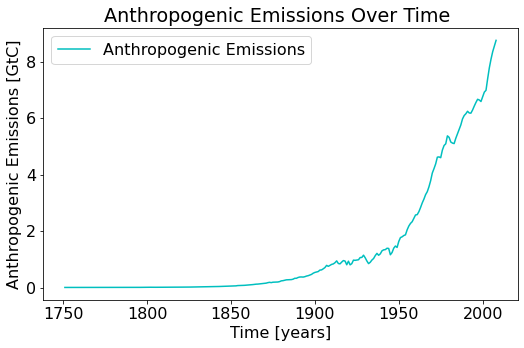

In [5]:
plt.figure(figsize=(8.5,11)) # 8.5" wide by 11" tall new figure
plt.rcParams.update({'font.size': 16}) # sets all font size for figures to 16

plt.subplot(2,1,1)
plt.plot(year,cflux,'c-', label='Anthropogenic Emissions') 
plt.xlabel('Time [years]')
plt.ylabel('Anthropogenic Emissions [GtC]')
plt.legend()

plt.title('Anthropogenic Emissions Over Time ')

### 3. Simulate the response of the carbon system to the anthropogenic emissions / create plots

In [6]:
ti_a = 1751 # initial time start [years]
tf_a = 2008 # ending time [years]
dt_a = 1/365 # change in time [days]

t_a = np.arange(ti_a,tf_a+dt_a,dt_a) # create an array starting at ti_a, going to tf_a+dt_a, with dt_a step size

Nt_a = t_a.size + 1 # return the size of t but add 1 to make the diff command work, makes i element one longer

cflux_t_a = np.interp(t_a, year, cflux) # returns 1D piecewise linear interpolation for t_a data points
                                        # t_a = x coordinates at which to evaluate interpolated values at
                                        # year = x coordinates of the data points
                                        # cflux = y coordinates of the data points

F_a = cflux_t_a # anthropogenic forcing term equal to interpolated emissions data

M1_a = np.zeros((Nt_a,)) # create an array with Nt rows of zeros
M2_a = np.zeros((Nt_a,)) # create an array with Nt rows of zeros

for i in np.arange(Nt_a): # loop through all elements in an array in this case going from 0 to (Nt-1)
    if (i==0):

        M1_a[i] = M1[-1] # sets the first element in M1_a equal to the last value of M1 calculated in part A(3)
        M2_a[i] = M2[-1] # sets the first element in M2_a equal to the last value of M2 calculated in part A(3)
        
    else:
        dM1_a_dt = k21*M2_a[i-1] - k12*M1_a[i-1]*M2_a[i-1] + F_a[i-1] # the forced change in carbon in the atmosphere WRT 
                                                                      # = respirtation & decay - photosynthesis + forcing term
        dM2_a_dt = k12*M1_a[i-1]*M2_a[i-1] - k21*M2_a[i-1] # the forced change in carbon in the land WRT 
                                                           # = photosynthesis - respiration & decay
                                                           # notice no forcing term is added, unlike the atmosphere equation
                                                           # anthropogenic emissions not included because this is a toy model
        
        M1_a[i] = M1_a[i-1] + dM1_a_dt*dt_a # mass of carbon in the atmosphere = 
                                            # previous mass of carbon in the atmosphere + change of carbon in the atmosphere
        M2_a[i] = M2_a[i-1] + dM2_a_dt*dt_a # mass of carbon in the land = 
                                            # previous mass of carbon in the land + change of carbon in the land
 
diffM1_a = np.diff(M1_a) # used in plot #3, calculates differences between M1_a array elements
                         # needed to add t_a.size + 1 to get this command to work 
diffM2_a = np.diff(M2_a) # used in plot #4, calculates differences between M2_a array elements
                         # needed to add t_a.size + 1 to get this command to work 

M1_a = M1_a[0:(i)] # fixing index size so subplots 3 and 4 have the same x and y value
M2_a = M2_a[0:(i)] # colon opperator is non inclusive of last element, or i-1
                   # this makes M1_a and M2_a to only include elements from 0 to t_a

#### Plots

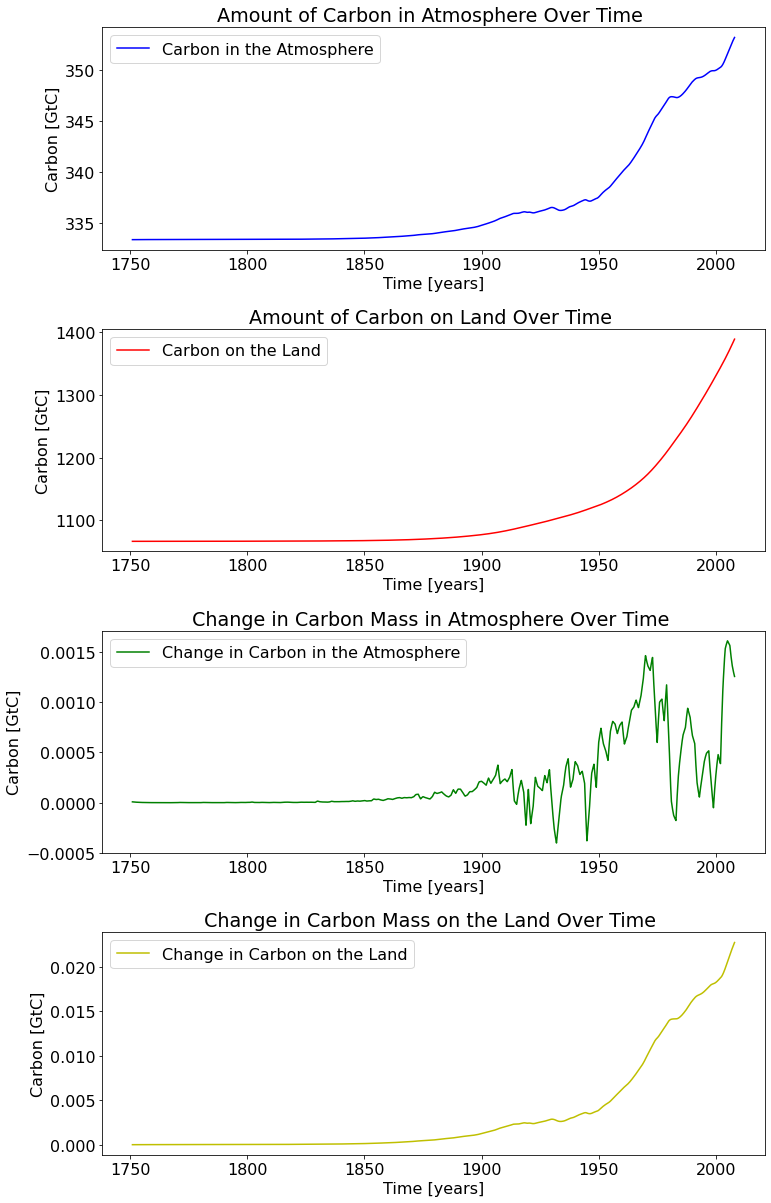

In [7]:
plt.figure(figsize=(11,17)) # 11" wide by 17" tall new figure
plt.rcParams.update({'font.size': 16}) # sets all font size for figures to 16

# Mass of C in the atmosphere versus time

fig = plt.subplot(4,1,1)
plt.plot(t_a,M1_a,'b-', label='Carbon in the Atmosphere') # x = time, y = numerical solution mass of carbon in atmosphere
plt.xlabel('Time [years]')
plt.ylabel('Carbon [GtC]')
plt.legend()
plt.title('Amount of Carbon in Atmosphere Over Time ')

plt.tight_layout() # change spacing between subplots for appearance

# Mass of C in the land versus time

plt.subplot(4,1,2)
plt.plot(t_a,M2_a,'r-', label='Carbon on the Land') # x = time, y = numerical solution mass of carbon on land
plt.xlabel('Time [years]')
plt.ylabel('Carbon [GtC]')
plt.legend()
plt.title('Amount of Carbon on Land Over Time ')

plt.tight_layout()

# The change in mass of C in the atmosphere vs time

plt.subplot(4,1,3)
plt.plot(t_a,diffM1_a,'g-', label='Change in Carbon in the Atmosphere') 
plt.xlabel('Time [years]')
plt.ylabel('Carbon [GtC]')
plt.legend()
plt.title('Change in Carbon Mass in Atmosphere Over Time ')

plt.tight_layout()

# The change in mass of C in the biosphere vs time

plt.subplot(4,1,4)
plt.plot(t_a,diffM2_a,'y-', label='Change in Carbon on the Land') 
plt.xlabel('Time [years]')
plt.ylabel('Carbon [GtC]')
plt.legend()
plt.title('Change in Carbon Mass on the Land Over Time ')

plt.tight_layout()

### 4. Print M1 and M2 values

In [8]:
print('M1 = '+str(M1_a[i-1])+' gigatons of carbon in atmosphere at the end of 2008\n')
print('M2 = '+str(M2_a[i-1])+' gigatons of carbon on land at the end of 2008')

M1 = 353.22824788827904 gigatons of carbon in atmosphere at the end of 2008

M2 = 1389.1417712620218 gigatons of carbon on land at the end of 2008


__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 

## Problem C: Examine the effects of mitigation

### 1. Load the alternative emission scenarios

In [16]:
future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'

data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1) # future_emissions_file = file name to be read
                                                                    # delimiter = string used to separate values
                                                                    # skiprows = skip the first row of the data file
year = data[:,0] # 1st column, years
cflux_nz2030 = data[:,1] # 2nd column, net zero 2030 data
cflux_nz2050 = data[:,2] # 3nd column, net zero 2050 data
cflux_zeg = data[:,3] # 4nd column, zero growth starting 2008

### 2.(a) Net zero emissions by 2030

In [17]:
ti_a = 2008 # initial time start [years]
tf_a = 2100 # ending time [years]
dt_a = 1/365 # change in time [days]

t_a = np.arange(ti_a,tf_a+dt_a,dt_a) # create an array starting at ti_a, going to tf_a+dt, with dt_a step size

Nt_a = t_a.size + 1 # return the size of t to make the diff command work, makes i element one longer

cflux_t_2030 = np.interp(t_a, year, cflux_nz2030) # returns 1D piecewise linear interpolation for t_a data points
                                                  # t_a = x coordinates at which to evaluate interpolated values at
                                                  # year = x coordinates of the data points
                                                  # cflux = y coordinates of the data points


F_a_2030 = cflux_t_2030 # anthropogenic forcing term

M1_a1 = np.zeros((Nt_a,)) # create an array with Nt rows of zeros
M2_a1 = np.zeros((Nt_a,)) # create an array with Nt rows of zeros

for i in np.arange(Nt_a): # loop through all elements in an array in this case going from 0 to (Nt-1)
    if (i==0):

        M1_a1[i] = M1_a[-1] # sets the first element in M1_a equal to the last value of M1 calculated in part B(4)
        M2_a1[i] = M2_a[-1] # sets the first element in M2_a equal to the last value of M2 calculated in part B(4)
        
    else:
        dM1_a_dt = k21*M2_a1[i-1] - k12*M1_a1[i-1]*M2_a1[i-1] + F_a_2030[i-1] # the change in carbon in the atmosphere WRT 
                                                                           # = respirtation & decay - photosynthesis 
                                                                           # + anthropogenic emissions flux
        dM2_a_dt = k12*M1_a1[i-1]*M2_a1[i-1] - k21*M2_a1[i-1]  # the change in carbon in the land WRT 
                                                            # = photosynthesis - respiration & decay
        
        M1_a1[i] = M1_a1[i-1] + dM1_a_dt*dt_a # mass of carbon in the atmosphere 
                                            # = previous mass of carbon in the atmosphere + change of carbon in the atmosphere
        M2_a1[i] = M2_a1[i-1] + dM2_a_dt*dt_a # mass of carbon in the land 
                                            # = previous mass of carbon in the land + change of carbon in the land

diffM1_a_2030 = np.diff(M1_a1) # used in plot #3
diffM2_a_2030 = np.diff(M2_a1) # used in plot #4

M1_a_2030 = M1_a1[0:i] # fixing index size so plots 3 and 4 have the same x and y value
M2_a_2030 = M2_a1[0:i] # colon opperator is non inclusive of last element

print('M1 2030 = '+str(M1_a_2030[i-1])+' gigatons\n')
print('M2 2030 = '+str(M2_a_2030[i-1])+' gigatons')

M1 2030 = 333.33333333335634 gigatons

M2 2030 = 1505.214170749825 gigatons


### 2.(b) Net zero emissions by 2050

In [18]:
ti_a = 2008 # initial time start
tf_a = 2100 # ending time
dt_a = 1/365 # change in time

t_a = np.arange(ti_a,tf_a+dt_a,dt_a) # create an array starting at ti, going to tf+dt, with dt step size

Nt_a = t_a.size + 1 # return the size of t to make the diff command work, makes i element one longer

cflux_t_2050 = np.interp(t_a, year, cflux_nz2050)

F_a_2050 = cflux_t_2050 # anthropogenic forcing term

M1_a2 = np.zeros((Nt_a,)) # create an array with Nt rows of zeros
M2_a2 = np.zeros((Nt_a,)) # create an array with Nt rows of zeros

for i in np.arange(Nt_a): # loop through all elements in an array in this case going from 0 to (Nt-1)
    if (i==0):

        M1_a2[i] = M1_a[-1] # sets the first element in M1_a equal to the last value of M1 calculated in part B(4)
        M2_a2[i] = M2_a[-1] # sets the first element in M2_a equal to the last value of M2 calculated in part B(4)
        
    else:
        dM1_a_dt = k21*M2_a2[i-1] - k12*M1_a2[i-1]*M2_a2[i-1] + F_a_2050[i-1] # the change in carbon in the atmosphere WRT 
                                                                           # = respirtation & decay - photosynthesis 
                                                                           # + anthropogenic emissions flux
        dM2_a_dt = k12*M1_a2[i-1]*M2_a2[i-1] - k21*M2_a2[i-1] # the change in carbon in the land WRT 
                                                           # = photosynthesis - respiration & decay
                                          
        M1_a2[i] = M1_a2[i-1] + dM1_a_dt*dt_a # mass of carbon in the atmosphere 
                                            # = previous mass of carbon in the atmosphere + change of carbon in the atmosphere
        M2_a2[i] = M2_a2[i-1] + dM2_a_dt*dt_a # mass of carbon in the land 
                                            # = previous mass of carbon in the land + change of carbon in the land
 
diffM1_a_2050 = np.diff(M1_a2) # used in plot #3
diffM2_a_2050 = np.diff(M2_a2) # used in plot #4

M1_a_2050 = M1_a2[0:(i)] # fixing index size so plots 3 and 4 have the same x and y value
M2_a_2050 = M2_a2[0:(i)] # colon opperator is non inclusive of last element!!

print('M1 2050 = '+str(M1_a_2050[i-1])+' gigatons\n')
print('M2 2050 = '+str(M2_a_2050[i-1])+' gigatons')

M1 2050 = 333.3333333333751 gigatons

M2 2050 = 1593.0441707510918 gigatons


### 2.(c) Zero emissions growth starting 2008

In [19]:
ti_a = 2008 # initial time start
tf_a = 2100 # ending time
dt_a = 1/365 # change in time

t_a = np.arange(ti_a,tf_a+dt_a,dt_a) # create an array starting at ti, going to tf+dt, with dt step size

Nt_a = t_a.size + 1 # return the size of t to make the diff command work, makes i element one longer

cflux_t_zeg = np.interp(t_a, year, cflux_zeg)

F_a_zeg = cflux_t_zeg # anthropogenic forcing term

M1_a3 = np.zeros((Nt_a,)) # create an array with Nt rows of zeros
M2_a3 = np.zeros((Nt_a,)) # create an array with Nt rows of zeros

for i in np.arange(Nt_a): # loop through all elements in an array in this case going from 0 to (Nt-1)
    if (i==0):

        M1_a3[i] = M1_a[-1] # sets the first element in M1_a equal to the last value of M1 calculated in part B(4)
        M2_a3[i] = M2_a[-1] # sets the first element in M2_a equal to the last value of M2 calculated in part B(4)
        
    else:
        dM1_a_dt = k21*M2_a3[i-1] - k12*M1_a3[i-1]*M2_a3[i-1] + F_a_zeg[i-1] # the change in carbon in the atmosphere WRT 
                                                                          # = respirtation & decay - photosynthesis 
                                                                          # + anthropogenic emissions flux
        dM2_a_dt = k12*M1_a3[i-1]*M2_a3[i-1] - k21*M2_a3[i-1] # the change in carbon in the land WRT 
                                                           # = photosynthesis - respiration & decay 
                                          
        M1_a3[i] = M1_a3[i-1] + dM1_a_dt*dt_a # mass of carbon in the atmosphere 
                                            # = previous mass of carbon in the atmosphere + change of carbon in the atmosphere
        M2_a3[i] = M2_a3[i-1] + dM2_a_dt*dt_a # mass of carbon in the land 
                                            # = previous mass of carbon in the land + change of carbon in the land

diffM1_a_zeg = np.diff(M1_a3) # used in plot #3
diffM2_a_zeg = np.diff(M2_a3) # used in plot #4

M1_a_zeg = M1_a3[0:(i)] # fixing index size so plots 3 and 4 have the same x and y value
M2_a_zeg = M2_a3[0:(i)] # colon opperator is non inclusive of last element

print('M1 ZEG 2008 = '+str(M1_a_zeg[i-1])+' gigatons\n')
print('M2 ZEG 2008 = '+str(M2_a_zeg[i-1])+' gigatons')

M1 ZEG 2008 = 346.6675284594091 gigatons

M2 ZEG 2008 = 2200.6104906909054 gigatons


### Plots 

M1 (Net Zero 2030) = 333.33333333335634 GtC
M2 (Net Zero 2030) = 1505.214170749825 GtC

M1 (Net Zero 2050) = 333.3333333333751 GtC
M2 (Net Zero 2050) = 1593.0441707510918 GtC

M1 (ZEG Starting 2008) = 346.6675284594091 GtC
M2 (ZEG Starting 2008) = 2200.6104906909054 GtC



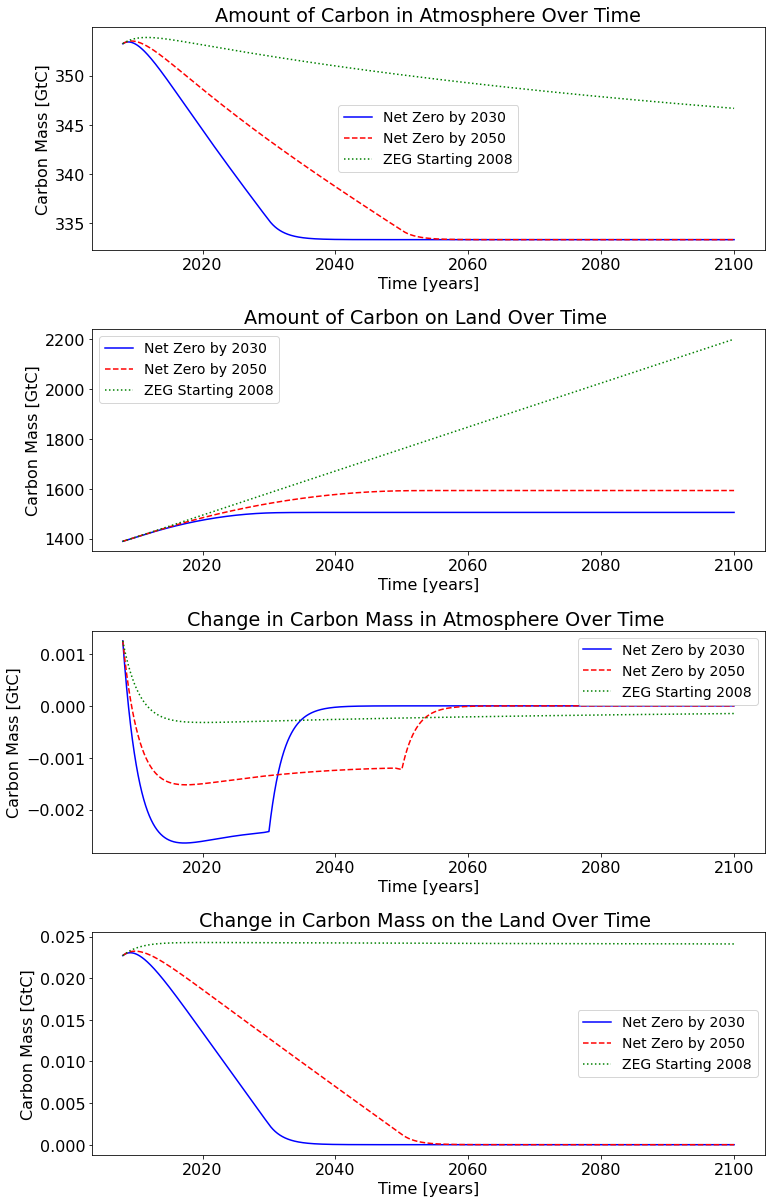

In [20]:
plt.figure(figsize=(11,17)) # 11" wide by 17" tall new figure
plt.rcParams.update({'font.size': 16}) # sets all font size for figures to 16

# Mass of C in the atmosphere versus time

fig = plt.subplot(4,1,1)
plt.plot(t_a,M1_a_2030,'b-', label='Net Zero by 2030') # x = time, y = numerical solution mass of carbon in atmosphere
plt.plot(t_a,M1_a_2050,'r--', label='Net Zero by 2050')
plt.plot(t_a,M1_a_zeg,'g:', label='ZEG Starting 2008')
plt.xlabel('Time [years]')
plt.ylabel('Carbon Mass [GtC]')
plt.legend(prop={'size': 14})
plt.title('Amount of Carbon in Atmosphere Over Time')

plt.tight_layout() # change spacing between subplots

# Mass of C in the land versus time

plt.subplot(4,1,2)
plt.plot(t_a,M2_a_2030,'b-', label='Net Zero by 2030') # x = time, y = numerical solution mass of carbon on land
plt.plot(t_a,M2_a_2050,'r--', label='Net Zero by 2050')
plt.plot(t_a,M2_a_zeg,'g:', label='ZEG Starting 2008')
plt.xlabel('Time [years]')
plt.ylabel('Carbon Mass [GtC]')
plt.legend(prop={'size': 14})
plt.title('Amount of Carbon on Land Over Time ') 

# The change in mass of C in the atmosphere vs time

plt.subplot(4,1,3)
plt.plot(t_a,diffM1_a_2030,'b-', label='Net Zero by 2030')
plt.plot(t_a,diffM1_a_2050,'r--', label='Net Zero by 2050')
plt.plot(t_a,diffM1_a_zeg,'g:', label='ZEG Starting 2008') 
plt.xlabel('Time [years]')
plt.ylabel('Carbon Mass [GtC]')
plt.legend(prop={'size': 14})
plt.title('Change in Carbon Mass in Atmosphere Over Time ')

plt.tight_layout() # change spacing between subplots

# The change in mass of C in the biosphere vs time

plt.subplot(4,1,4)
plt.plot(t_a,diffM2_a_2030,'b-', label='Net Zero by 2030') 
plt.plot(t_a,diffM2_a_2050,'r--', label='Net Zero by 2050') 
plt.plot(t_a,diffM2_a_zeg,'g:', label='ZEG Starting 2008') 
plt.xlabel('Time [years]')
plt.ylabel('Carbon Mass [GtC]')
plt.legend(prop={'size': 14})
plt.title('Change in Carbon Mass on the Land Over Time ') 

plt.tight_layout()

# print final values

print('M1 (Net Zero 2030) = '+str(M1_a_2030[i-1])+' GtC')   
print('M2 (Net Zero 2030) = '+str(M2_a_2030[i-1])+' GtC\n')

print('M1 (Net Zero 2050) = '+str(M1_a_2050[i-1])+' GtC')    
print('M2 (Net Zero 2050) = '+str(M2_a_2050[i-1])+' GtC\n') 

print('M1 (ZEG Starting 2008) = '+str(M1_a_zeg[i-1])+' GtC')     
print('M2 (ZEG Starting 2008) = '+str(M2_a_zeg[i-1])+' GtC\n')